# Capstone Three: 3. Modeling - Unsupervised<a id='3'></a>

### Anomaly Detection using Unsupervised Algorithms

## 3.1 Contents<a id='3.1'></a>
* [3. Modeling - Unsupervised](#3)
  * [3.1 Contents](#3.1)
  * [3.2 Imports](#3.2)
  * [3.3 Load Data](#3.3)
  * [3.4 Preprocessing: Train-Test Split and Standard Scaling](#3.4)
  * [3.5 Modeling](#3.5)
    * [3.5.1 Isolation Forest](#3.5.1)
    * [3.5.2 Local Outlier Factor](#3.5.2)

## 3.2 Imports<a id='3.2'></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#for modeling
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#filter warnings
import warnings
warnings.filterwarnings("ignore")

## 3.3 Load Data<a id='3.3'></a>

In [4]:
data = pd.read_csv("../data/data.csv")

## 3.4 Preprocessing: Train-Test Split and Standard Scaling<a id='3.4'></a>

In [5]:
X = data.drop(['Time', 'Class'], axis=1)   # Predictors
y = data['Class']                          # Predictand

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    random_state = 42, stratify=y)

In [5]:
# Standard Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.5 Modeling<a id='3.5'></a>

### 3.5.1 Isolation Forest<a id='3.5.1'></a>

In [6]:
clf = IsolationForest(n_estimators=100, random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_test)

In [7]:
# Rename Class labels
y_pred[y_pred == 1] = 0 
y_pred[y_pred == -1] = 1 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56651
           1       0.04      0.80      0.07        95

    accuracy                           0.96     56746
   macro avg       0.52      0.88      0.53     56746
weighted avg       1.00      0.96      0.98     56746

F1 score:0.0692


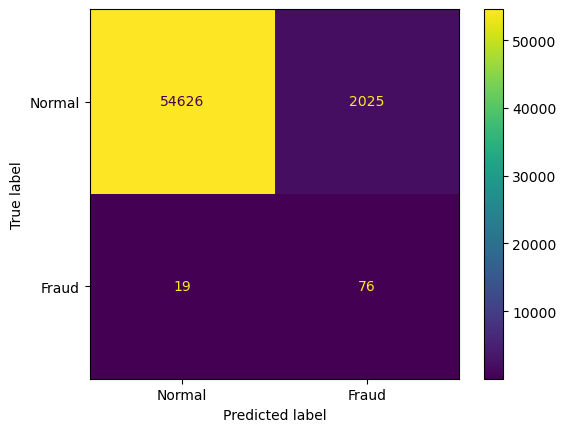

In [8]:
# Metrics
print(classification_report(y_test, y_pred))
print("F1 score:{0:.4f}".format(f1_score(y_test, y_pred, average='binary')))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Normal', 'Fraud'])
disp.plot()
plt.show()

### 3.5.2 Local Outlier Factor<a id='3.5.2'></a>

In [11]:
clf = LocalOutlierFactor(n_neighbors=100, contamination=0.1, novelty=True)
clf.fit(X_train)
y_pred = clf.predict(X_test)

In [13]:
# Rename Class labels
y_pred[y_pred == 1] = 0 
y_pred[y_pred == -1] = 1 

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56651
           1       0.00      0.18      0.01        95

    accuracy                           0.90     56746
   macro avg       0.50      0.54      0.48     56746
weighted avg       1.00      0.90      0.95     56746

F1 score:0.0059


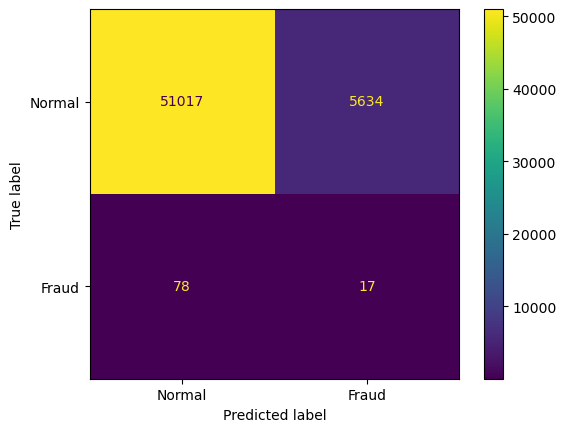

In [14]:
# Metrics
print(classification_report(y_test, y_pred))
print("F1 score:{0:.4f}".format(f1_score(y_test, y_pred, average='binary')))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Normal', 'Fraud'])
disp.plot()
plt.show()

### NOT use train-test split

#### Isolation Forest

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    283253
           1       0.04      0.81      0.07       473

    accuracy                           0.96    283726
   macro avg       0.52      0.89      0.53    283726
weighted avg       1.00      0.96      0.98    283726

F1 score:0.0690


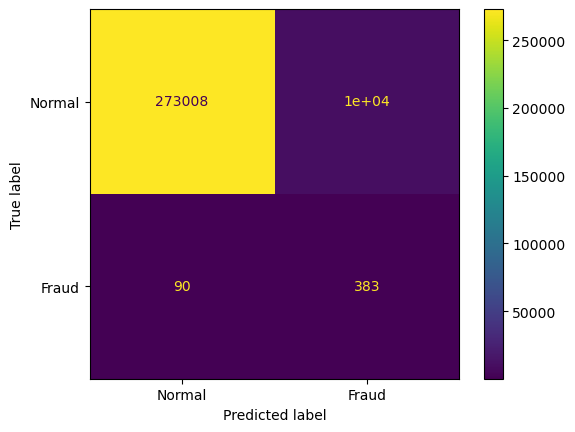

In [8]:
# Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

clf = IsolationForest(n_estimators=100, random_state=0)
clf.fit(X)
y_pred = clf.predict(X)

# Rename Class labels
y_pred[y_pred == 1] = 0 
y_pred[y_pred == -1] = 1 

# Metrics
print(classification_report(y, y_pred))
print("F1 score:{0:.4f}".format(f1_score(y, y_pred, average='binary')))
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Normal', 'Fraud'])
disp.plot()
plt.show()